array(17.55936091)

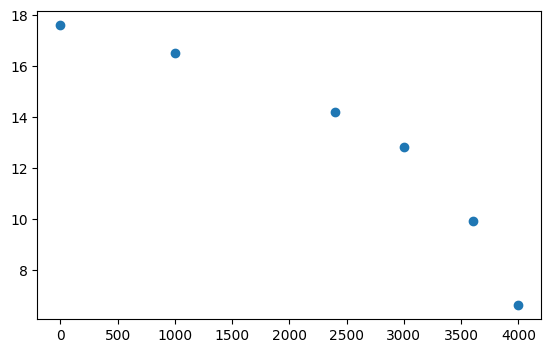

In [3]:
import json
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Opening JSON file
f = open("ESP_json.db")
  
# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()


ID = '879'

# Iterating through the json
# list

#for i in data:
#    print(f'{i:-^50}')
#    for j in data[i]:
#        print(j,"=",data[i][j])
        
def ESP_Head(ID,Q):
    
    cs = CubicSpline(data[ID]['rate_points'], data[ID]['head_points'])
    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(data[ID]['rate_points'], data[ID]['head_points'], 'o', label='data')
    return cs(Q)

ESP_Head(ID,50)

покажем характеристики ЭЦН на графике

ESP_ID = 879
rate_points = [0, 1000, 2400, 3000, 3600, 4000]
head_points = [17.6, 16.5, 14.2, 12.8, 9.9, 6.6]


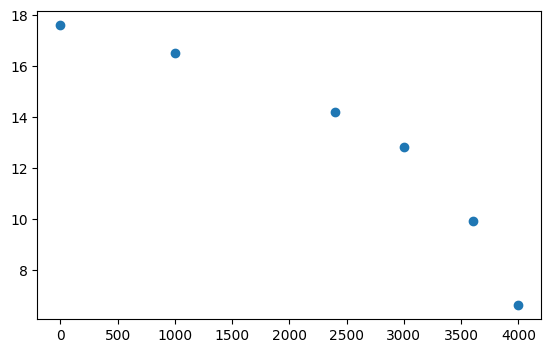

In [2]:
print("ESP_ID = {}".format(ID))
print("rate_points = {}".format(data[ID]['rate_points']))
print("head_points = {}".format(data[ID]['head_points']))

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(data[ID]['rate_points'], data[ID]['head_points'], 'o', label='data')
